In [90]:
import numpy as np
import cv2 as cv 
import matplotlib.pyplot as plt 

In [91]:
def load():
    img = np.zeros((600,600))
    font = cv.FONT_HERSHEY_SIMPLEX
    fontscale = 5
    cv.putText(img,"ABCDE",(50,300),font , fontscale, (255,255,255),thickness = 25, lineType= cv.LINE_AA)
    return img

In [92]:
def display(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap="gray")

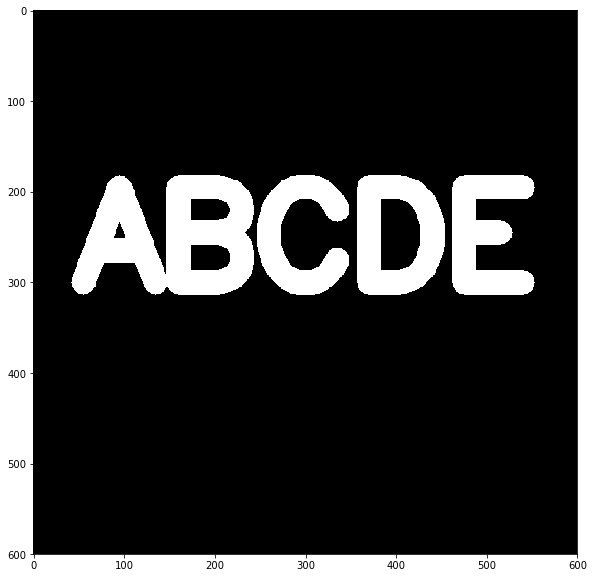

In [93]:
img1 = load()
display(img1)

In [94]:
kernal = np.ones((5,5),dtype=np.uint8)
kernal

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

dtype('float64')

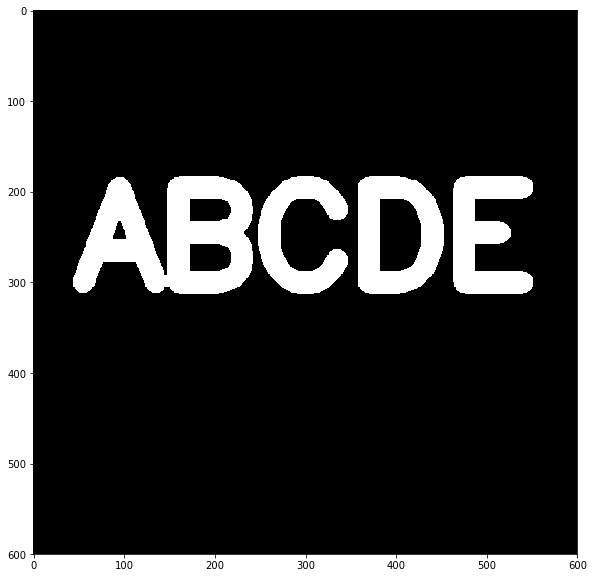

In [95]:
erosion1 = cv.erode(img1,kernal,iterations=1)
display(result)
result.dtype

In [99]:
# Making a noisy image 

noise = np.random.randint(0,2,(600,600))
noise = noise*255
noise
# noise.shape

array([[255,   0, 255, ..., 255,   0,   0],
       [  0, 255, 255, ...,   0,   0, 255],
       [255, 255,   0, ..., 255, 255, 255],
       ...,
       [255, 255,   0, ...,   0, 255, 255],
       [  0, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

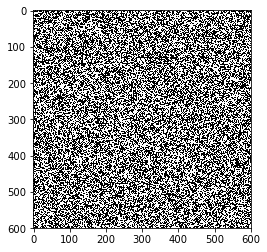

In [100]:
plt.imshow(noise, cmap='gray')

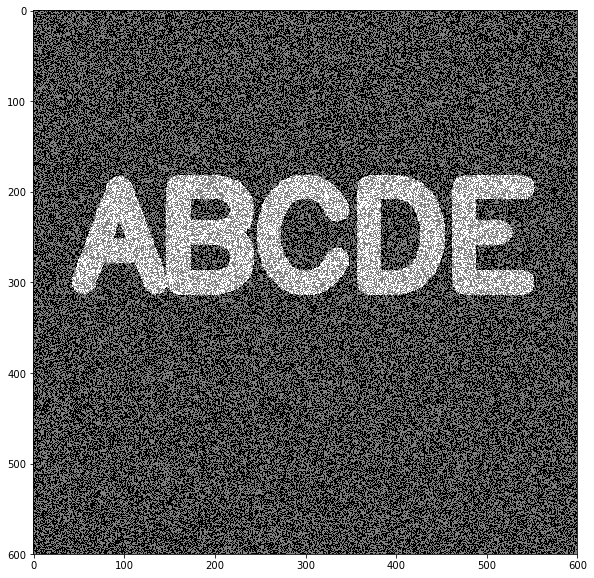

In [101]:
noisenresult =noise+img1
display(noisenresult)

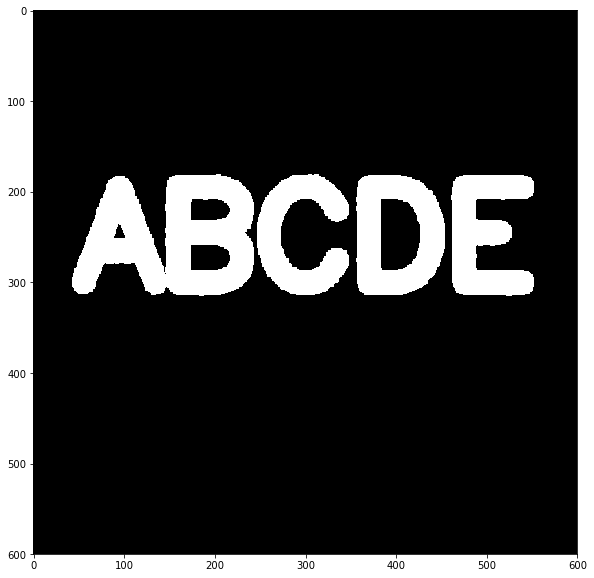

In [102]:
morph1 = cv.morphologyEx(noisenresult,cv.MORPH_OPEN,kernal)
display(morph1)

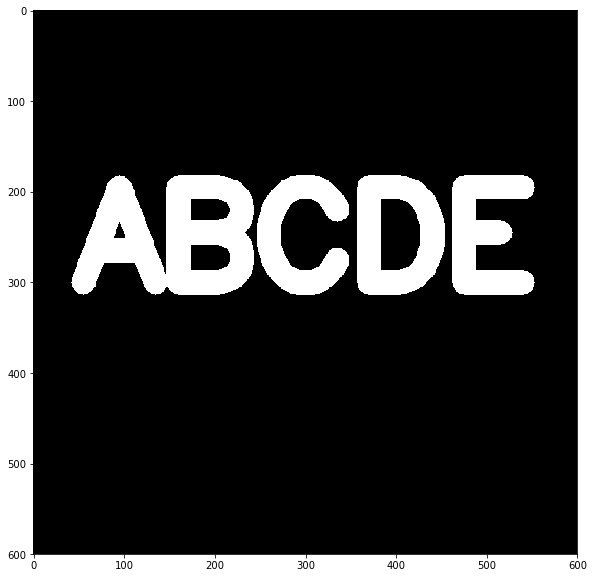

In [104]:
img2dilation = load()
display(img2dilation)

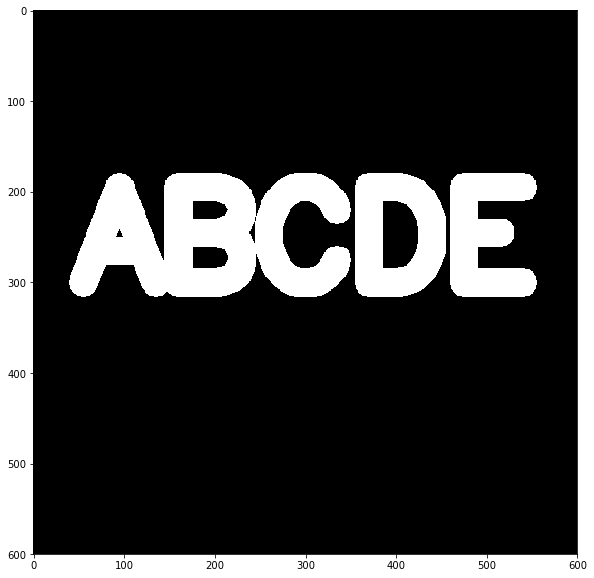

In [106]:
# Dilation is opposite process of erosion

dilation = cv.dilate(img2dilation,kernal,)
display(dilation)

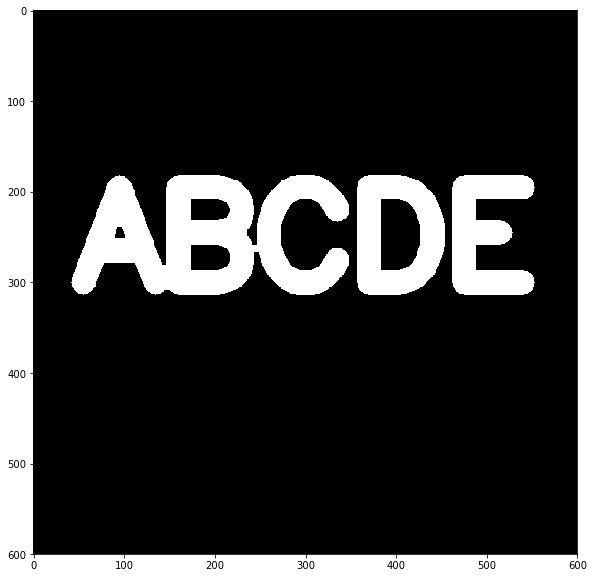

In [111]:
imgforclosingmorph = load()

closing = cv.morphologyEx(imgforclosingmorph,cv.MORPH_CLOSE,kernal,)
display(closing)

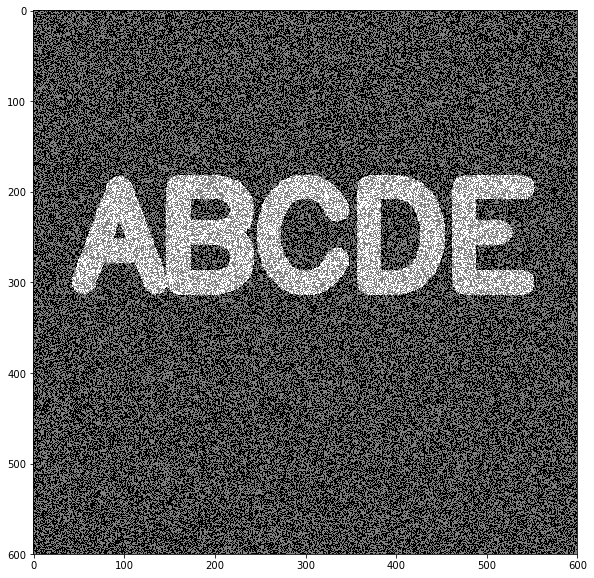

In [112]:
# adding noise to the closing morph image

result = noise + imgforclosingmorph
display(result)

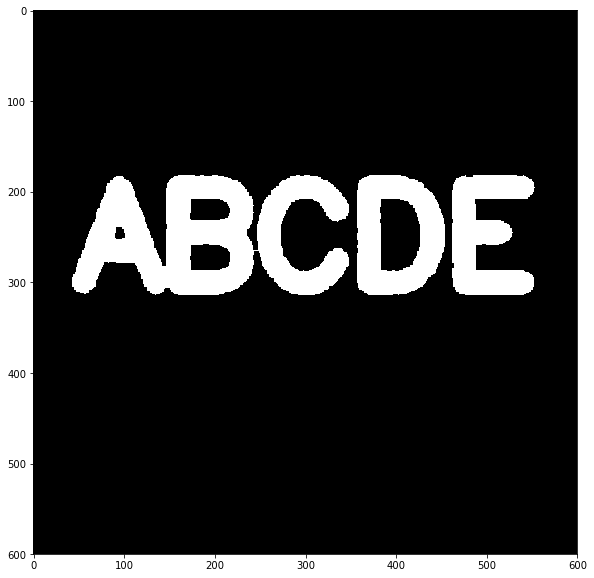

In [114]:
againclosing = cv.morphologyEx(result,cv.MORPH_CLOSE,kernal)
display(againclosing)

In [136]:
#  making another noise image 

noise2 = np.random.randint(0,2,(600,600),np.uint8)
noise2 = noise2*-255
noise2

array([[   0, -255,    0, ...,    0, -255, -255],
       [   0,    0,    0, ...,    0, -255, -255],
       [-255, -255,    0, ..., -255,    0, -255],
       ...,
       [   0,    0, -255, ..., -255,    0,    0],
       [-255, -255,    0, ...,    0, -255, -255],
       [   0, -255,    0, ...,    0, -255,    0]], dtype=int16)

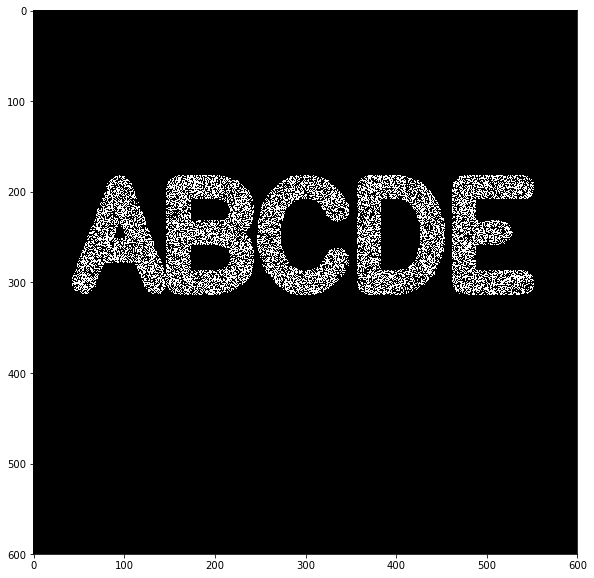

In [142]:
newimg = load()
newimg = newimg + noise2

newimg.min()
newimg[newimg == -255] = 0 
display(newimg)

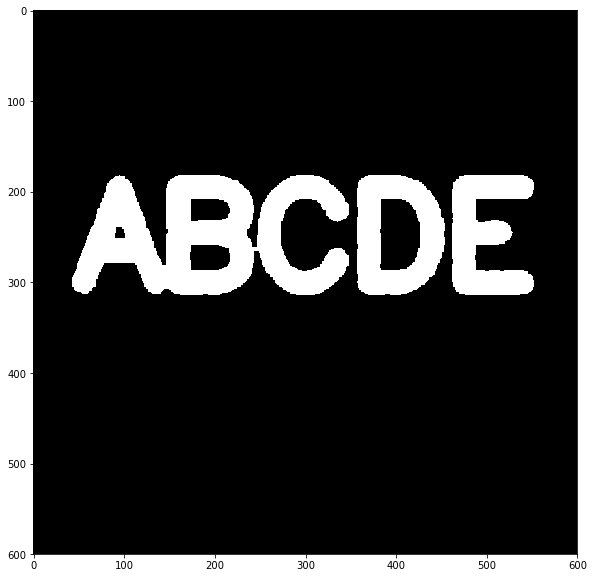

In [143]:
newimgclosingmorprh = cv.morphologyEx(newimg,cv.MORPH_CLOSE,kernal)
display(newimgclosingmorprh)

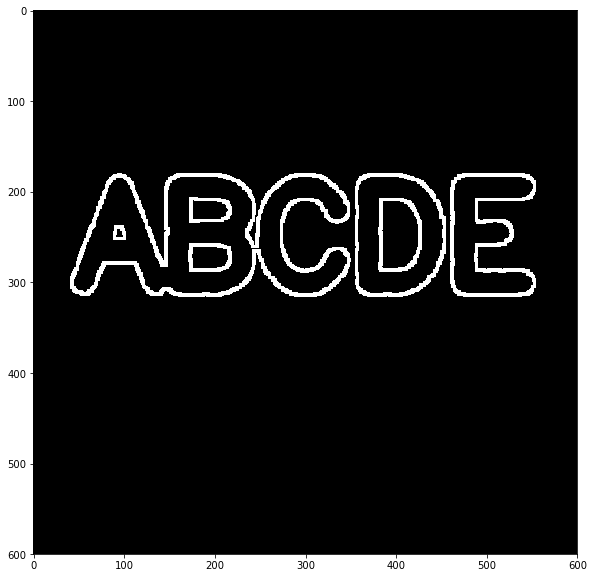

In [145]:
gradientmorph = cv.morphologyEx(newimgclosingmorprh, cv.MORPH_GRADIENT,kernal)
display(gradientmorph)